## Task 1 - Sentiment Analysis - RNN models

In [ ]:
# Task 1: Sentiment Analysis on IMDB Reviews using Different RNN Architectures

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, GRU

# Load IMDB dataset
vocab_size = 10000  # Top 10,000 words
maxlen = 200  # Max review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Define model builder function
def build_model(rnn_layer):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=maxlen),
        rnn_layer,
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# 1. Simple RNN
simple_rnn_model = build_model(SimpleRNN(64))
simple_rnn_model.summary()
simple_rnn_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# 2. LSTM
lstm_model = build_model(LSTM(64))
lstm_model.summary()
lstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)

# 3. Bidirectional LSTM
bilstm_model = build_model(Bidirectional(LSTM(64)))
bilstm_model.summary()
bilstm_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# 4. Stacked LSTM
stacked_lstm_model = Sequential([
    Embedding(vocab_size, 64, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
stacked_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
stacked_lstm_model.summary()
stacked_lstm_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# 5. GRU
gru_model = build_model(GRU(64))
gru_model.summary()
gru_model.fit(x_train, y_train, epochs=1, validation_split=0.2, batch_size=128)

# Evaluate all models
def evaluate_model(model, name):
    loss, acc = model.evaluate(x_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}, Loss: {loss:.4f}")

evaluate_model(simple_rnn_model, "Simple RNN")
evaluate_model(lstm_model, "LSTM")
evaluate_model(bilstm_model, "Bidirectional LSTM")
evaluate_model(stacked_lstm_model, "Stacked LSTM")
evaluate_model(gru_model, "GRU")

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.5463 - loss: 0.6793 - val_accuracy: 0.8018 - val_loss: 0.4346


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 65s 393ms/step - accuracy: 0.6421 - loss: 0.6188 - val_accuracy: 0.8384 - val_loss: 0.3735
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 380ms/step - accuracy: 0.8915 - loss: 0.2765 - val_accuracy: 0.8718 - val_loss: 0.3145
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 380ms/step - accuracy: 0.9269 - loss: 0.2011 - val_accuracy: 0.8664 - val_loss: 0.3286


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 110s 668ms/step - accuracy: 0.6535 - loss: 0.5909 - val_accuracy: 0.8524 - val_loss: 0.3510


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 88s 536ms/step - accuracy: 0.6868 - loss: 0.5499 - val_accuracy: 0.7974 - val_loss: 0.4251


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

157/157 ━━━━━━━━━━━━━━━━━━━━ 70s 430ms/step - accuracy: 0.6480 - loss: 0.6026 - val_accuracy: 0.8630 - val_loss: 0.3382
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8101 - loss: 0.4323
Simple RNN Accuracy: 0.8100, Loss: 0.4309
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8631 - loss: 0.3433
LSTM Accuracy: 0.8630, Loss: 0.3400
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step - accuracy: 0.8528 - loss: 0.3514
Bidirectional LSTM Accuracy: 0.8537, Loss: 0.3500
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.7992 - loss: 0.4237
Stacked LSTM Accuracy: 0.7960, Loss: 0.4281
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8603 - loss: 0.3399
GRU Accuracy: 0.8591, Loss: 0.3431


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.6154 - loss: 0.6414 - val_accuracy: 0.8058 - val_loss: 0.4322
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8520 - loss: 0.3489 - val_accuracy: 0.8346 - val_loss: 0.3976
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9178 - loss: 0.2160 - val_accuracy: 0.8502 - val_loss: 0.3845


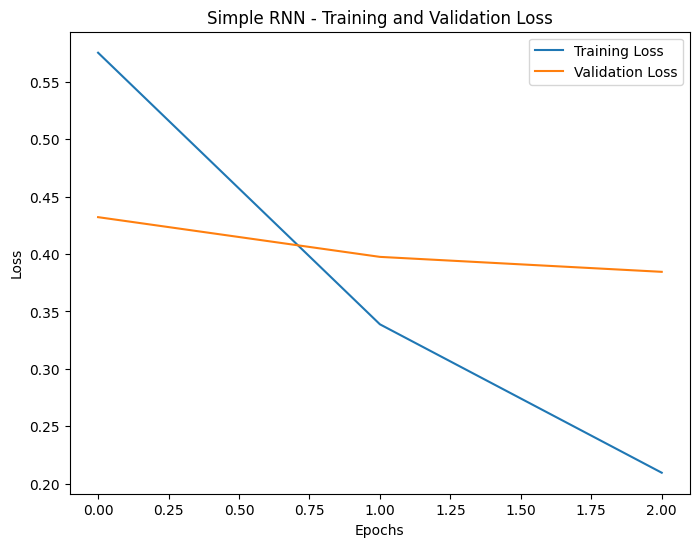

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6813 - loss: 0.5731 - val_accuracy: 0.8470 - val_loss: 0.3520
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8954 - loss: 0.2698 - val_accuracy: 0.8648 - val_loss: 0.3190
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9260 - loss: 0.2019 - val_accuracy: 0.8756 - val_loss: 0.3106


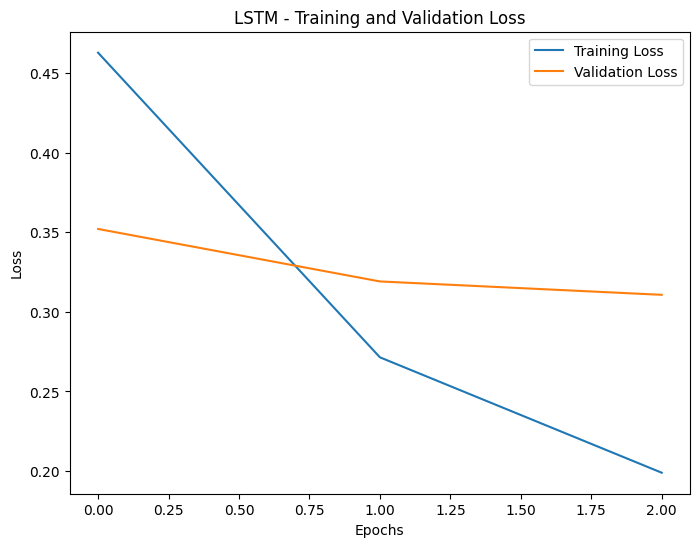

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6369 - loss: 0.5929 - val_accuracy: 0.8666 - val_loss: 0.3233
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8947 - loss: 0.2783 - val_accuracy: 0.8606 - val_loss: 0.3205
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9268 - loss: 0.1946 - val_accuracy: 0.8556 - val_loss: 0.3365


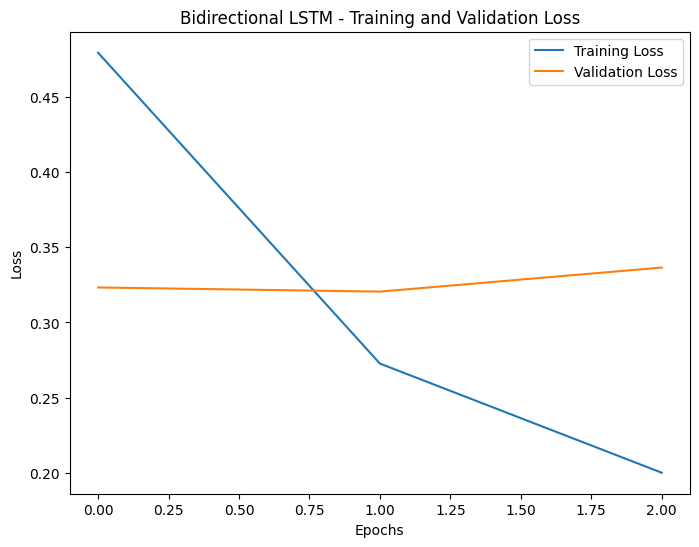

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.6533 - loss: 0.6084 - val_accuracy: 0.8396 - val_loss: 0.3800
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8855 - loss: 0.2938 - val_accuracy: 0.8640 - val_loss: 0.3177
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9245 - loss: 0.2126 - val_accuracy: 0.8650 - val_loss: 0.3235


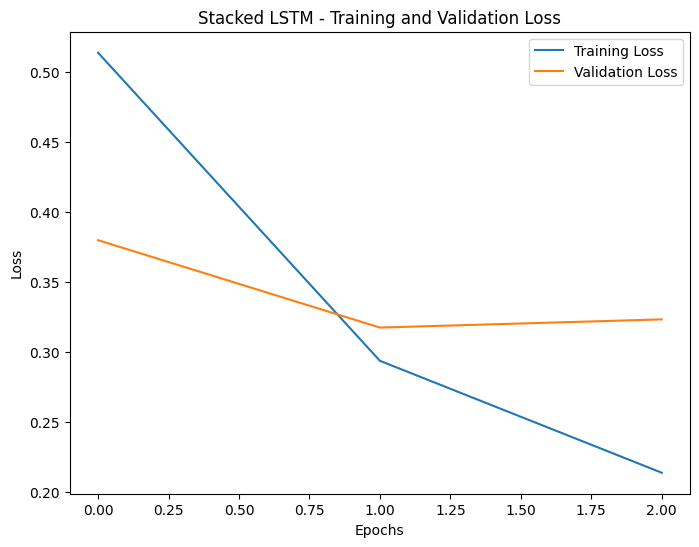

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6498 - loss: 0.5991 - val_accuracy: 0.8534 - val_loss: 0.3498
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8965 - loss: 0.2572 - val_accuracy: 0.8678 - val_loss: 0.3141
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9340 - loss: 0.1856 - val_accuracy: 0.8644 - val_loss: 0.3258


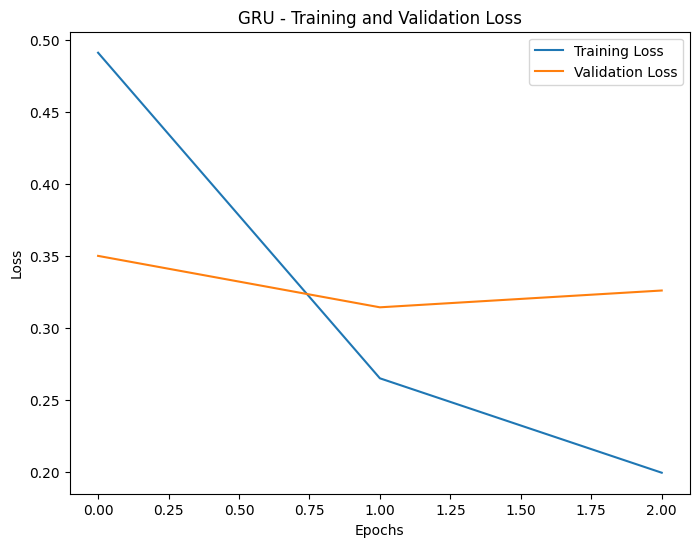

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8444 - loss: 0.3949
Simple RNN Accuracy: 0.8446, Loss: 0.3956
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8711 - loss: 0.3289
LSTM Accuracy: 0.8707, Loss: 0.3282
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8462 - loss: 0.3569
Bidirectional LSTM Accuracy: 0.8478, Loss: 0.3559
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8600 - loss: 0.3374
Stacked LSTM Accuracy: 0.8629, Loss: 0.3373
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8545 - loss: 0.3414
GRU Accuracy: 0.8530, Loss: 0.3444

Predictions on New Text:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Simple RNN: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
LSTM: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Bidirectional LSTM: Positive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Stacked LSTM: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
GRU: Positive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Load IMDB dataset
vocab_size = 10000  # Top 10,000 words
maxlen = 200  # Max review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Initialize tokenizer and fit on training data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts([i for i in imdb.get_word_index().keys()])  # Fit tokenizer on IMDB dataset

# Define model builder function
def build_model(rnn_layer):
    model = Sequential([
        Embedding(vocab_size, 64, input_length=maxlen),
        rnn_layer,
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to plot training and validation loss
def plot_loss(history, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to make predictions on new text
def predict_new_text(model, text, tokenizer, maxlen=200):
    # Preprocess text: Tokenize and pad the sequence
    tokenized_text = tokenizer.texts_to_sequences([text])  # Tokenize the new text
    if not tokenized_text[0]:  # Check if the text is empty after tokenization
        return "Invalid input text."
    padded_text = pad_sequences(tokenized_text, maxlen=maxlen, padding='post')  # Pad the sequence
    prediction = model.predict(padded_text)  # Get prediction
    return "Positive" if prediction >= 0.5 else "Negative"

# 1. Simple RNN
simple_rnn_model = build_model(SimpleRNN(64))
simple_rnn_history = simple_rnn_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(simple_rnn_history, "Simple RNN")

# 2. LSTM
lstm_model = build_model(LSTM(64))
lstm_history = lstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(lstm_history, "LSTM")

# 3. Bidirectional LSTM
bilstm_model = build_model(Bidirectional(LSTM(64)))
bilstm_history = bilstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(bilstm_history, "Bidirectional LSTM")

# 4. Stacked LSTM
stacked_lstm_model = Sequential([
    Embedding(vocab_size, 64, input_length=maxlen),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])
stacked_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
stacked_lstm_history = stacked_lstm_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(stacked_lstm_history, "Stacked LSTM")

# 5. GRU
gru_model = build_model(GRU(64))
gru_history = gru_model.fit(x_train, y_train, epochs=3, validation_split=0.2, batch_size=128)
plot_loss(gru_history, "GRU")

# Evaluate all models
def evaluate_model(model, name):
    loss, acc = model.evaluate(x_test, y_test)
    print(f"{name} Accuracy: {acc:.4f}, Loss: {loss:.4f}")

evaluate_model(simple_rnn_model, "Simple RNN")
evaluate_model(lstm_model, "LSTM")
evaluate_model(bilstm_model, "Bidirectional LSTM")
evaluate_model(stacked_lstm_model, "Stacked LSTM")
evaluate_model(gru_model, "GRU")

# Predict on new text using all models
new_text = "I loved the movie, it was fantastic and thrilling!"

print("\nPredictions on New Text:")
print(f"Simple RNN: {predict_new_text(simple_rnn_model, new_text, tokenizer)}")
print(f"LSTM: {predict_new_text(lstm_model, new_text, tokenizer)}")
print(f"Bidirectional LSTM: {predict_new_text(bilstm_model, new_text, tokenizer)}")
print(f"Stacked LSTM: {predict_new_text(stacked_lstm_model, new_text, tokenizer)}")
print(f"GRU: {predict_new_text(gru_model, new_text, tokenizer)}")